# Comparison of different frequency data sets after scaling

In [1]:
import os
import sys
from datetime import datetime
# import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#import sympy as sym
import torch

sys.path.append('../src')
import deepymod_torch.VE_datagen as VE_datagen
from deepymod_torch.library_function import strain_input_library
from deepymod_torch.DeepMod import DeepMoD
import deepymod_torch.VE_params as VE_params

np.random.seed(0)
torch.manual_seed(0)

/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

## Data generation

> The below cell is very important for preparing the generation, examination, and saving of the data. It is one of only a few cells that requires configuration in the notebook.

Specify the functional form of the input

### First generation

In [2]:
# sinc
omega_1 = 40
omega = omega_1
Amp = 7
input_expr = lambda t: Amp*np.sin(omega*t)/(omega*t)
d_input_expr = lambda t: (Amp/t)*(np.cos(omega*t) - np.sin(omega*t)/(omega*t))
input_torch_lambda = lambda t: Amp*torch.sin(omega*t)/(omega*t)

input_type = 'Strain'

Specify the model parameters

In [3]:
E = [5e-4, 5e-4]#, 5e-4]
eta = [2.5e-5]#, 0.16e-3]

tau = [eta[0]/E[1]]#, eta[1]/E[2]]
tau

[0.05]

In [4]:
time_array = np.linspace(1e-10, 10*np.pi/omega, 5000).reshape(-1, 1)

Specify the independant data points over which to synthesise the data, as well as restarting the random seeds

In [5]:
strain_array, stress_array = VE_datagen.calculate_strain_stress(input_type, time_array, input_expr, E, eta, D_input_lambda=d_input_expr)

In [6]:
# 'normalising'
time_sf = omega
strain_sf = 0.1
stress_sf = 100

time_array *= time_sf
strain_array *= strain_sf
stress_array *= stress_sf

### Second generation

In [7]:
# sinc
omega_2 = 2
omega = omega_2
Amp = 7
input_expr = lambda t: Amp*np.sin(omega*t)/(omega*t)
d_input_expr = lambda t: (Amp/t)*(np.cos(omega*t) - np.sin(omega*t)/(omega*t))
input_torch_lambda = lambda t: Amp*torch.sin(omega*t)/(omega*t)

input_type = 'Strain'

Specify the model parameters

In [8]:
eta = [5e-4]#, 0.16e-3]

tau = [eta[0]/E[1]]#, eta[1]/E[2]]
tau

[1.0]

In [9]:
time_array_2 = np.linspace(1e-10, 10*np.pi/omega, 5000).reshape(-1, 1)

Specify the independant data points over which to synthesise the data, as well as restarting the random seeds

In [10]:
strain_array_2, stress_array_2 = VE_datagen.calculate_strain_stress(input_type, time_array_2, input_expr, E, eta, D_input_lambda=d_input_expr)

In [11]:
# 'normalising'
time_sf = omega
strain_sf = 0.1
stress_sf = 100

time_array_2 *= time_sf
strain_array_2 *= strain_sf
stress_array_2 *= stress_sf

## Plotting

Text(0.5, 1.0, 'omega is: 40')

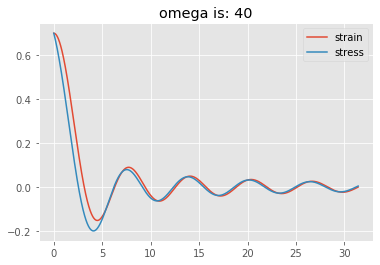

In [12]:
plt.plot(time_array.flatten(), strain_array.flatten(), label='strain')
plt.plot(time_array.flatten(), stress_array.flatten(), label='stress')
plt.legend()
plt.title('omega is: '+str(omega_1))

Text(0.5, 1.0, 'omega is: 2')

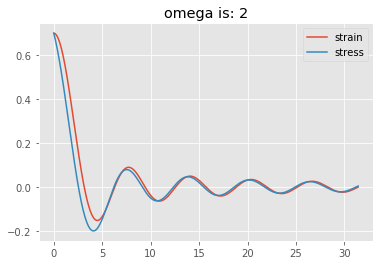

In [13]:
plt.plot(time_array_2.flatten(), strain_array_2.flatten(), label='strain')
plt.plot(time_array_2.flatten(), stress_array_2.flatten(), label='stress')
plt.legend()
plt.title('omega is: '+str(omega_2))

In [14]:
time_resid = time_array - time_array_2
strain_resid = strain_array - strain_array_2
stress_resid = stress_array - stress_array_2

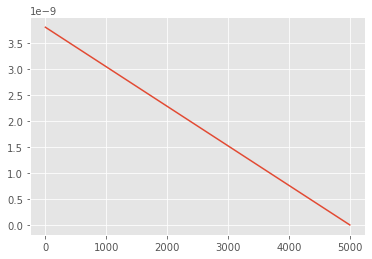

In [15]:
plt.plot(time_resid.flatten())

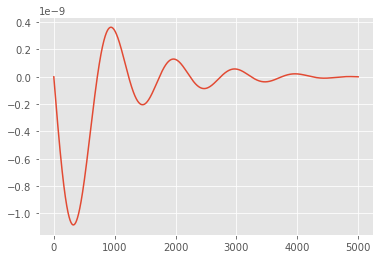

In [16]:
plt.plot(strain_resid.flatten())

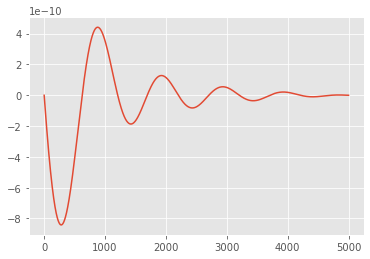

In [17]:
plt.plot(stress_resid.flatten())